In [2]:
import pandas as pd
import numpy as np

In [3]:
movies=pd.read_csv('HollywoodMovies.csv')

In [4]:
movies.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


From the data provided on Hollywood movies:
1.Find the highest rated movie in the“Quest” story type.    

In [84]:
grp=movies[movies['Story']=='Quest'].groupby(['RottenTomatoes','Movie'])

In [98]:
Highest=''
for n,g in grp:
    Highest=n
    
print(Highest)    

(97.0, 'The Muppets')


2.Find the genre in which there has been the greatest number of movie releases

In [117]:
movies.groupby(['Genre']).count()['Movie'].head(1)

Genre
Action    166
Name: Movie, dtype: int64

3.Print the names of the top five movies with the costliest budgets.

In [137]:
movies.sort_values(by=['Budget'],ascending=False).head(5)['Movie']

3      Pirates of the Caribbean: At World's End
468                                     Tangled
0                                  Spider-Man 3
778                       The Dark Knight Rises
241      Harry Potter and the Half-Blood Prince
Name: Movie, dtype: object

4.Is there any correspondence between the critics’ evaluation of a movie and itsacceptance by the public? Find out, by plotting the net profitability of a movie against the ratings it receives on Rotten Tomatoes.

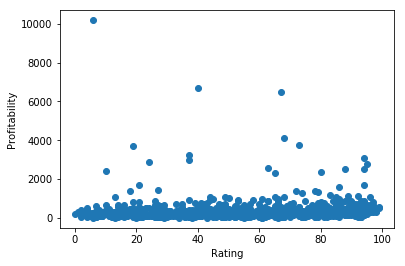

In [148]:
y=movies['Profitability']
x=movies['RottenTomatoes']
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel('Rating')
plt.ylabel('Profitability')
plt.show() #No correlation 

5.Perform Operations on Files
5.1: From the raw data below create a data frame'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'], 'age': [42, 52, 36, 24, 73], 'preTestScore': [4, 24, 31, ".", "."],'postTestScore': ["25,000", "94,000", 57, 62, 70]

5.2: Save the dataframe into a csv file as example.csv
5.3: Read the example.csv and print the data frame
5.4: Read the example.csv without column heading 
5.5: Read the example.csv and make the index columns as 'First Name’ and 'Last Name'
5.6:  Print  the  data  frame  in  a  Boolean  form  as  True  or  False.  True  for  Null/  NaN values and false for non-nullvalues
5.7: Read the dataframe by skipping first 3 rows and print the data frame
5.8: Load a csv file while interpreting "," in strings around numbers as thousands seperators. Check the raw data 'postTestScore' column has, as thousands separator. 


In [150]:
d1=pd.DataFrame({'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'], 'age': [42, 52, 36, 24, 73], 'preTestScore': [4, 24, 31, ".", "."],'postTestScore': ["25,000", "94,000", 57, 62, 70]})

In [151]:
d1

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [152]:
d2.to_csv('example.csv')

In [153]:
d3=pd.read_csv('example.csv')
d3

,Unnamed: 0,first_name,last_name,age,preTestScore,postTestScore
0,0,Jason,Miller,42,4,"25,000"
1,1,Molly,Jacobson,52,24,"94,000"
2,2,Tina,.,36,31,57
3,3,Jake,Milner,24,.,62
4,4,Amy,Cooze,73,.,70


In [157]:
d4=pd.read_csv('example.csv',skiprows=[0],header=None)
d4

,0,1,2,3,4,5
0,0,Jason,Miller,42,4,"25,000"
1,1,Molly,Jacobson,52,24,"94,000"
2,2,Tina,.,36,31,57
3,3,Jake,Milner,24,.,62
4,4,Amy,Cooze,73,.,70


In [188]:
d5=pd.read_csv('example.csv',header=0,names=['first_name','Last Name','age','preTestScore','postTestScore'])
d5

,first_name,Last Name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [190]:
 #note there is . instead of nan as input data
d5.replace(".",np.nan,inplace=True)    
d5.isna()

,first_name,Last Name,age,preTestScore,postTestScore
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,False,False,True,False


In [175]:
d5=pd.read_csv('example.csv',skiprows=3,header=None)
d5

,0,1,2,3,4,5
0,2,Tina,.,36,31,57
1,3,Jake,Milner,24,.,62
2,4,Amy,Cooze,73,.,70


In [204]:
d8=pd.read_csv('example.csv',usecols=[0,1,2,3,4,5],index_col=0,thousands=',')
d8

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25000
1,Molly,Jacobson,52,24,94000
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


6.1: From the raw data below create a Pandas Series'Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'a) Print all elements in lower caseb) Print all the elements in upper casec) Print the length of all the elements

In [222]:
s1=pd.Series(['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'])

In [231]:
for s in s1:
    print(str(s).lower())    

amit
bob
kate
a
b
nan
car
dog
cat


In [232]:
for s in s1:
    print(str(s).upper())

AMIT
BOB
KATE
A
B
NAN
CAR
DOG
CAT


In [234]:
s1.size

9

6.2: From the raw data below create a Pandas Series' Atul', 'John ', ' jack ', 'Sam'a) Print all elements after stripping spaces from the left and rightb) Print all the elements after removing spaces from the left onlyc) Print all the elements after removing spaces from the right only

In [235]:
s2=pd.Series(['Atul','John','Jack','Sam'])

In [238]:
s2.apply(lambda x:str(x).strip())

0    Atul
1    John
2    Jack
3     Sam
dtype: object

In [239]:
s2.apply(lambda x:str(x).lstrip())

0    Atul
1    John
2    Jack
3     Sam
dtype: object

In [240]:
s2.apply(lambda x:str(x).rstrip())

0    Atul
1    John
2    Jack
3     Sam
dtype: object


6.3: -Create a series from the raw data below'India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'a)split the individual strings wherever ‘_’ comes and create a list out of it.b)Access the individual element of a listc)Expand the elements so that all individual elements get splitted by ‘_’ and insted of list returns individual elements

In [262]:
s1=pd.Series(['India_is_big','Population_is_huge',np.nan,'Has_diverse_culture'])

In [252]:
def resplit(s):
    return str(s).split('_')


In [256]:
s3=s1.apply(resplit)

In [261]:
print(s3[0][0],s3[0][1],s3[0][2:])

India is ['big']


In [270]:
s1.str.split('_',expand=True)

,0,1,2
0,India,is,big
1,Population,is,huge
2,NaN,NaN,NaN
3,Has,diverse,culture


6.4: Create a series and replace either X or dog with XX-XX'A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'

In [271]:
s4=pd.Series(['A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'])

In [274]:
s4.replace(regex=r'X|dog', value='XX-XX')

0           A
1           B
2           C
3    AabXX-XX
4    BacXX-XX
5            
6         NaN
7        CABA
8       XX-XX
9         cat
dtype: object

6.5: Create a series and remove $ from numerical values

In [311]:
s4=pd.Series(['12','-$10','$10,000'])

In [318]:
ss4=s4.str.replace('[$,]', '')

In [319]:
ss4.astype(int)

0       12
1      -10
2    10000
dtype: int32

6.6 Create a series and reverse all lower case words

In [321]:
s5=pd.Series(['india 1998','big country',np.nan])

In [323]:
s5.str[::-1]

0     8991 aidni
1    yrtnuoc gib
2            NaN
dtype: object

6.7: Create pandas series and print true if value is alphanumeric in series or false if value is not alpha numeric in series.'1', '2', '1a', '2b', '2003c'

In [330]:
s6=pd.Series(['1','2','1a','2b','2003c'])

In [335]:
s6.str.isalpha()

0    False
1    False
2    False
3    False
4    False
dtype: bool

6.8: Create pandas series and print true if value is containing ‘A’'1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c'


In [336]:
s7=pd.Series(['1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c'])

In [343]:
s7.str.find('A')!=-1

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool

6.9: Create pandas series and print in three columns value 0 or 1 is a or b or c exists in values'a', 'a|b', np.nan, 'a|c'

In [345]:
s8=pd.Series(['a', 'a|b', np.nan, 'a|c'])

In [349]:
s8.apply(lambda x:1 if str(x).find('a')!=-1 else 0)

0    1
1    1
2    1
3    1
dtype: int64

In [350]:
s8.apply(lambda x:1 if str(x).find('b')!=-1 else 0)

0    0
1    1
2    0
3    0
dtype: int64

In [351]:
s8.apply(lambda x:1 if str(x).find('c')!=-1 else 0)

0    0
1    0
2    0
3    1
dtype: int64

6.10: Create pandas dataframe having keys and ltable and rtable as below -'key': ['One', 'Two'], 'ltable': [1, 2]'key': ['One', 'Two'], 'rtable': [4, 5]Merge both the tables based of key

In [352]:
df1=pd.DataFrame({'key':['One', 'Two'],'ltable':[1, 2]})

In [353]:
df2=pd.DataFrame({'key':['One', 'Two'],'rtable':[4, 5]})

In [354]:
df1.merge(df2,on='key')

,key,ltable,rtable
0,One,1,4
1,Two,2,5
